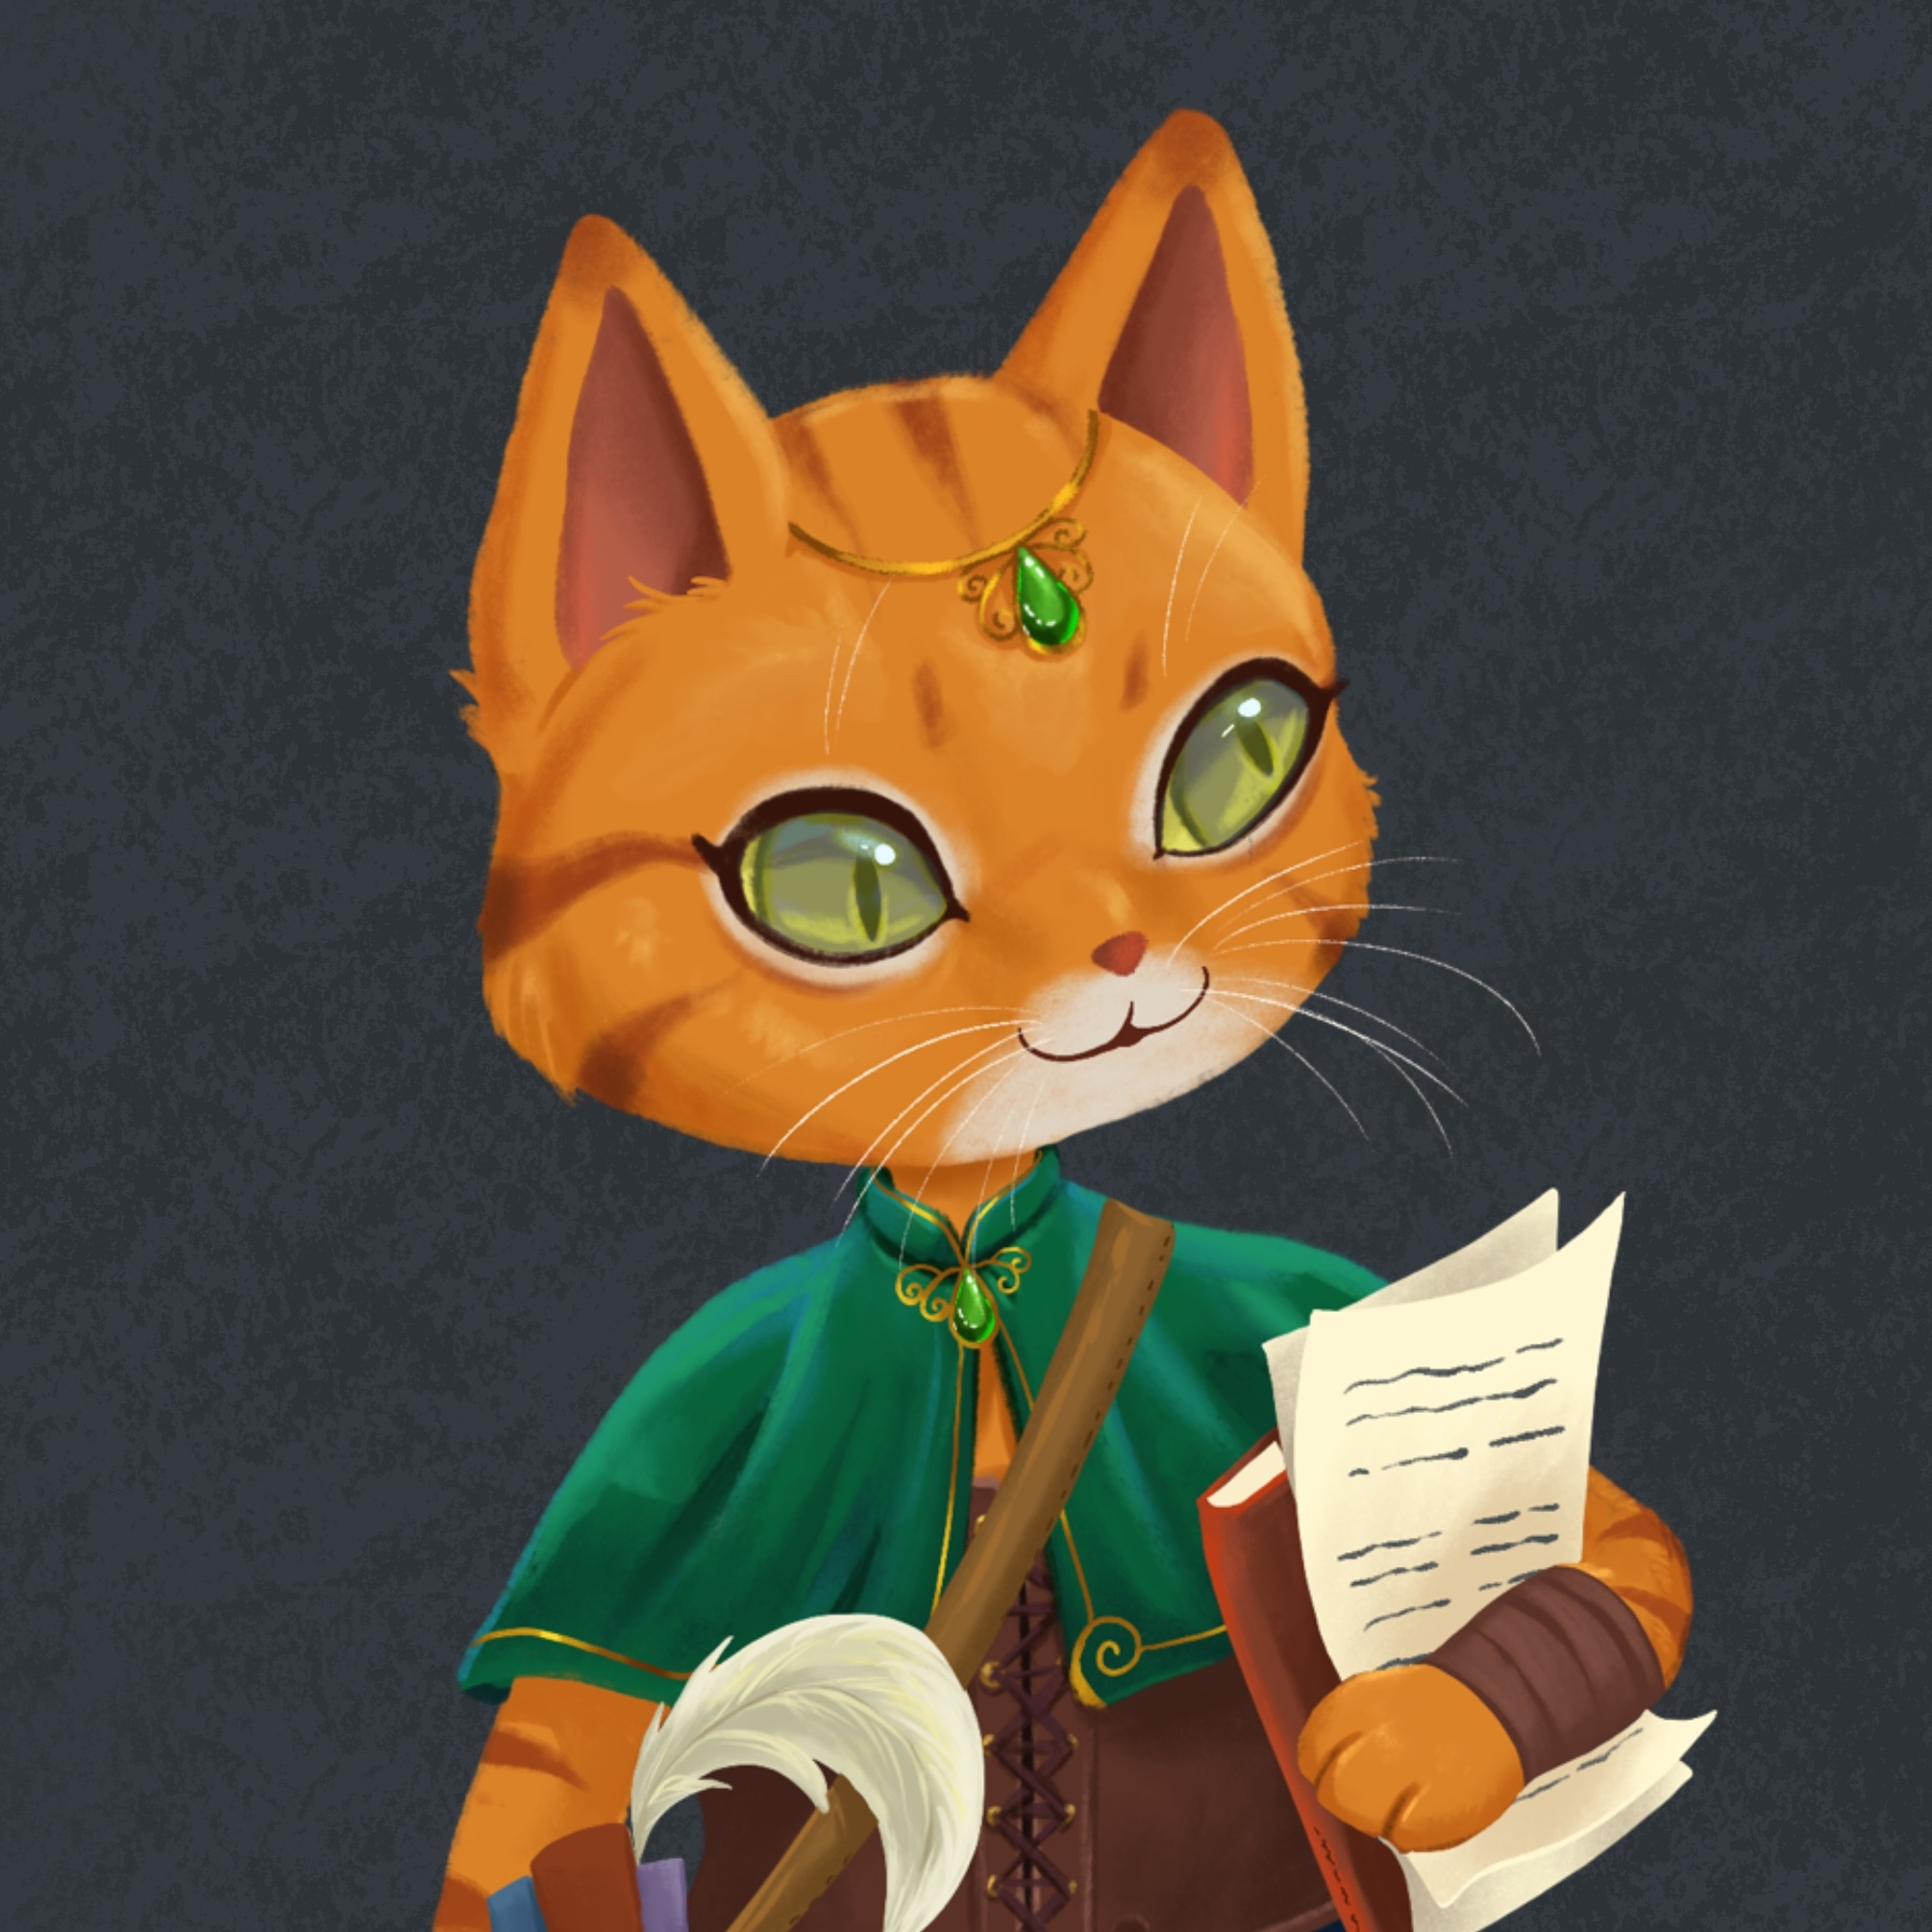

# Quantum Kittens - Chapter 2 - Qiskit Code

For instructions on how to get started with Qiskit visit [https://docs.quantum-computing.ibm.com/start](https://docs.quantum-computing.ibm.com/start).

In [54]:
# Install Qiskit along with some optional dependencies useful for visualization 
# by uncommenting the instruction below if you don't have Qiskit installed already

#pip install'qiskit[visualization]'


In [55]:
# Install the Qiskit Runtime Service if you don't have it installed already by uncommenting the instruction below

#pip install qiskit-ibm-runtime

In [56]:
# Install the Qiskit Aer Simulator if you don't have it installed already by uncommenting the instruction below

#pip install qiskit-aer

In [57]:
# Import necessary Qiskit libraries

from qiskit import QuantumCircuit

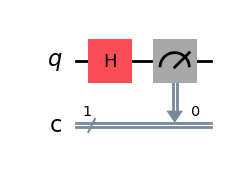

In [58]:
#Create Marble Circuit

marble_circuit = QuantumCircuit(1, 1) # add one qubit (Whiskerton marble) and one classical bit (to store the measurement outcome)

marble_circuit.h(0) # add H-gate or Hadamard gate to the qubit (this is the quantum gate that puts the marble in superposition)

marble_circuit.measure(0,0) # add a measurement operator (this is equivalent to a cat looking directly at a marble)

marble_circuit.draw('mpl') # see how the circuit looks

In [59]:
# Import necessary Qiskit libraries for running the circuit on a simulator

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram


In [60]:
#Run Marble Circuit,
#That is, see if the marble turns red or blue

marble_state = {'1': 'red', '0': 'blue'}

aer_sim = AerSimulator() # Identify the quantum computer to run this on. In this case it's a simulator not a real device.
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1) 
isa_marble_circuit = pm.run(marble_circuit) # This line and the line above essentially prepare the circuit to be executed on the device you selected. For for more technical details, please see: https://docs.quantum.ibm.com/api/qiskit/transpiler#transpiler

# fetch and print the outcome:
sampler = Sampler(mode=aer_sim)

result = sampler.run([isa_marble_circuit], shots=1000).result() # Run the circuit on the simulator 1000 times to gather statistics.
counts = result[0].data.c.get_counts()

ans = str(max(counts, key=counts.get))

print('The marble is ' + marble_state[ans] + '.') # The outcome is the one associated with the highest count.




The marble is blue.


Your result in the form of counts: {'1': 490, '0': 510}
Thus, in 1000 shots, you get blue 510 times, and red 490 times.


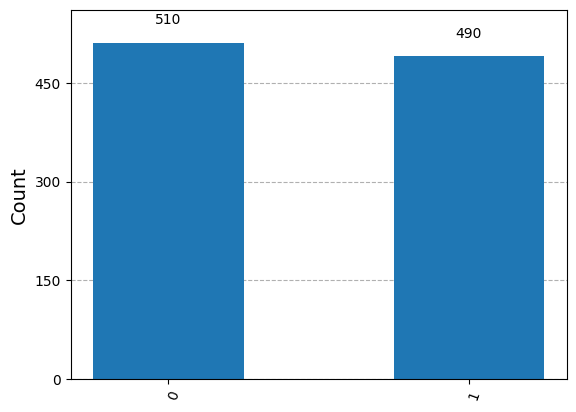

In [61]:
# Examine the statistics and plot histogram

print("Your result in the form of counts:", counts)
print("Thus, in 1000 shots, you get blue " + str(counts['0']) + " times, and red " + str(counts['1']) + " times.")

plot_histogram(counts)


*Note: the Qiskit code provided is open source, and does not fall under the copyright of Quantum Kittens.*

In [52]:
# If you want to run the circuit on a real device then you can use the following 

#from qiskit_ibm_runtime import QiskitRuntimeService
 
#service = QiskitRuntimeService(channel="ibm_quantum", token="<insert your token here>")
 